<a href="https://colab.research.google.com/github/egbubemi/github-/blob/main/Wholesale_Customer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the necessary libraries.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
wholesale_data = pd.read_csv('Wholesale customers data.csv')
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# showing the number of rows and columns in the wholesale customer dataset

wholesale_data.shape

(440, 8)

In [ ]:
wholesale_data2 = wholesale_data.iloc[:,2:8]
wholesale_data2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
#Descriptive Analysis of the dataset
# this shows the type of each columns in the dataset

wholesale_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [ ]:
# (Count,Maximum, Minimum,Standard deviation, Mean  and Transposing the output for better understanding statistics

wholesale_data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [ ]:
#### DATA EXPLORATION

In [ ]:
# Checking for null values in each columns 

wholesale_data2.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

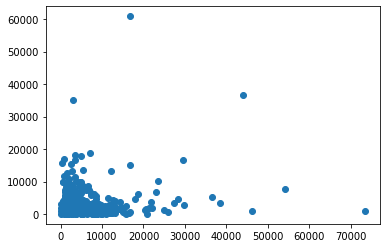

In [ ]:
#scatter plot comparing two of the columns

plt.scatter(wholesale_data2['Milk'],wholesale_data2['Frozen'])
plt.show()

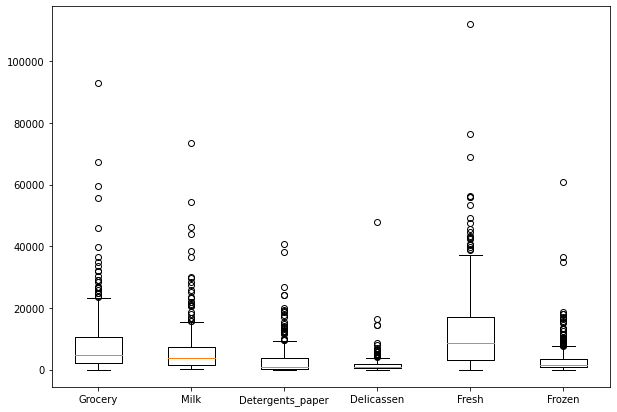

In [ ]:
#using boxplot to understand the distribution side by side of the numerical target variable for clustering

fig = plt.figure(figsize =(10, 7))
plt.boxplot(x= [wholesale_data2['Grocery'],wholesale_data2['Milk'],wholesale_data2['Detergents_Paper'],
                wholesale_data2['Delicassen'],wholesale_data2['Fresh'],wholesale_data2['Frozen']])
plt.xticks([1,2,3,4,5,6],['Grocery','Milk','Detergents_paper','Delicassen','Fresh','Frozen'])
plt.show()

From the above details we can see that we dont have any missing columns in our data set and all the columns are mainlu numeric(inter64). we can proceed to using pairplot() to plotting a scatter plot and an histogram for each numeric column with seaborn.

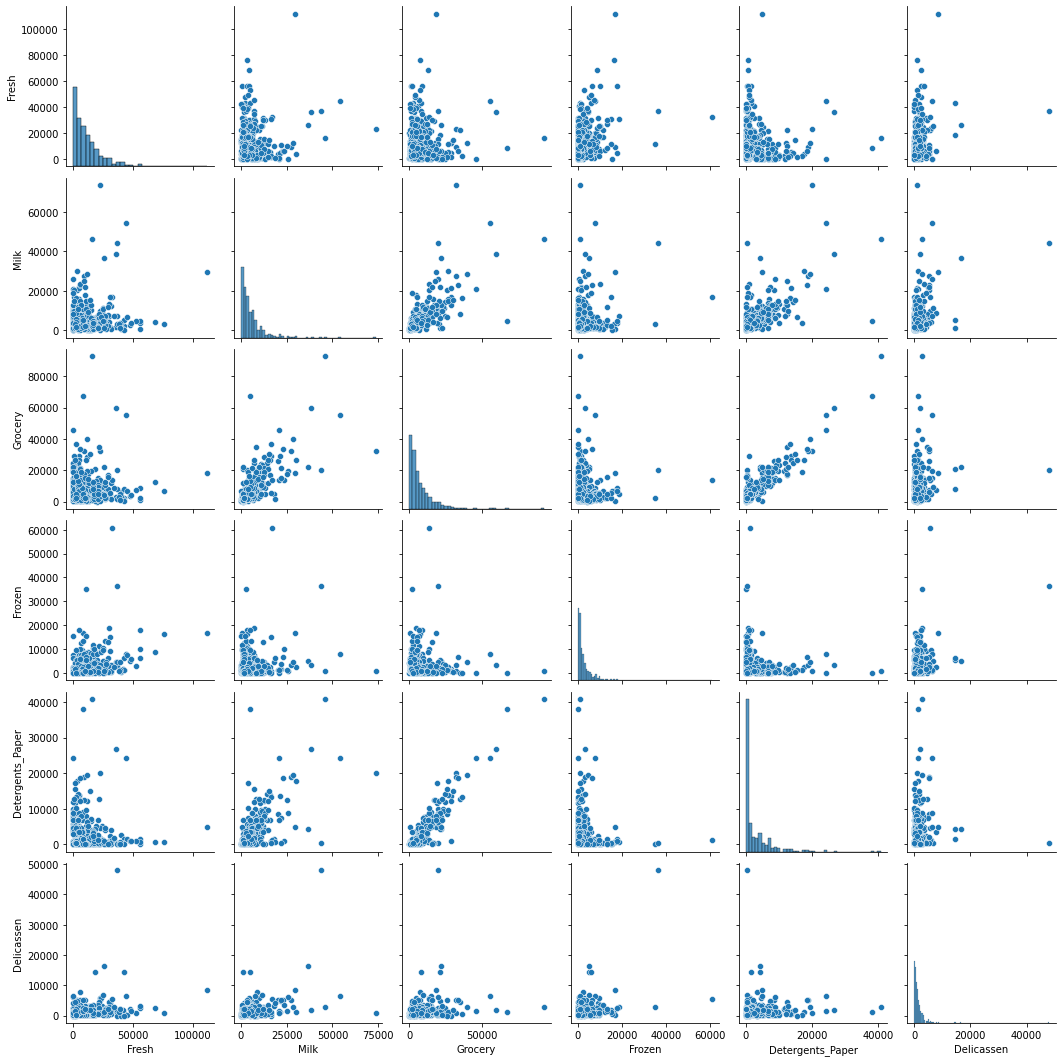

In [ ]:
A = sns.pairplot(wholesale_data2)

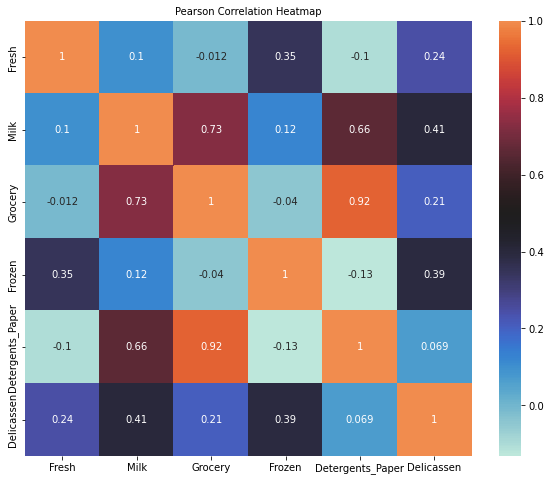

In [ ]:
# Pearsons Correlation heatmaps
plt.figure(figsize = (10,8))
plt.title('Pearson Correlation Heatmap', fontsize = 10)
sns.heatmap(wholesale_data2.corr(),center = 0.5,annot = True)

In [ ]:
## Scaling the data 

X = wholesale_data2.values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

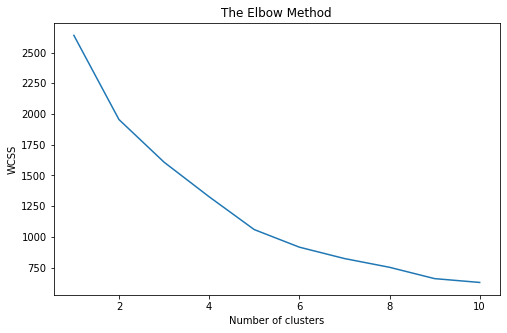

In [ ]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i  in range (1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

fig = plt.figure(figsize =(8, 5))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Fitting  K- means to the dataset

kmeans = KMeans(n_clusters = 5,init ='k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([3, 1, 1, 3, 0, 3, 3, 3, 3, 1, 1, 3, 0, 1, 1, 3, 1, 3, 3, 3, 3, 3,
       0, 1, 1, 3, 3, 3, 1, 0, 3, 3, 3, 0, 3, 1, 0, 1, 1, 0, 0, 3, 1, 1,
       1, 1, 1, 4, 1, 1, 3, 3, 0, 1, 3, 3, 4, 1, 3, 3, 3, 4, 3, 1, 3, 4,
       3, 1, 3, 3, 0, 0, 3, 0, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 4, 4, 0,
       3, 0, 3, 3, 4, 0, 1, 3, 3, 3, 3, 3, 1, 1, 3, 0, 3, 3, 1, 1, 3, 1,
       3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1,
       0, 3, 3, 3, 3, 0, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 0, 0, 1,
       3, 3, 1, 1, 0, 3, 3, 1, 3, 3, 3, 1, 3, 4, 3, 3, 1, 1, 1, 3, 1, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 4, 3, 0, 1, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       1, 1, 1, 3, 1, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,

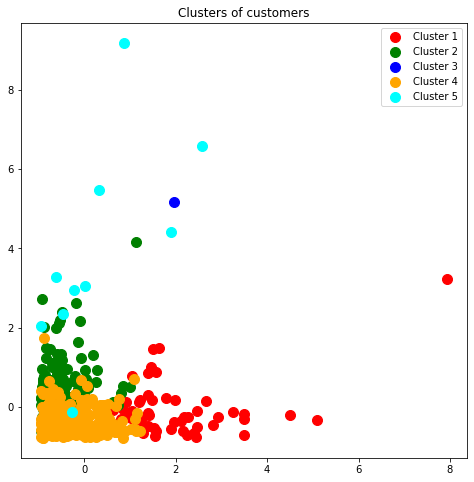

In [ ]:
# show 5 and plotting the various clusters

plt.figure(figsize= (8,8))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'green',label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'blue',label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'orange',label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'cyan',label = 'Cluster 5')
plt.title('Clusters of customers(model1)')
plt.legend()
plt.show()

In [ ]:

kmeans2 = KMeans(n_clusters = 2,init ='k-means++', random_state= 42)
y_kmeans2 = kmeans.fit_predict(X)

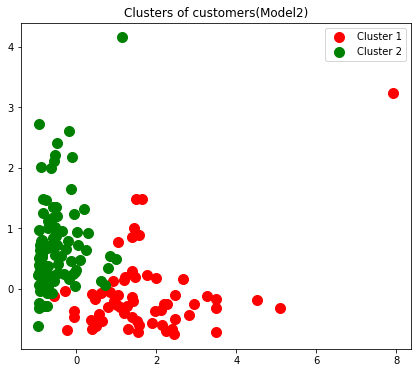

In [ ]:

plt.figure(figsize= (7,6))
plt.scatter(X[y_kmeans2 == 0,0], X[y_kmeans2 == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans2 == 1,0], X[y_kmeans2 == 1,1], s = 100, c = 'green',label = 'Cluster 2')
plt.title('Clusters of customers(Model2)')
plt.legend()
plt.show()

In [ ]:
from sklearn import cluster
whole_clusters = wholesale_data2
whole_clusters['cluster'] = y_kmeans

<ipython-input-18-6c4529829d44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_clusters['cluster'] = y_kmeans


In [ ]:
whole_clusters.cluster.value_counts()

3    270
1     96
0     63
4     10
2      1
Name: cluster, dtype: int64

In [ ]:
### using PCA for better visualization
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
pc = pca.fit_transform(X)
pc_wholesale_data2 = pd.DataFrame(pc)
pc_wholesale_data2.columns = ['pc1','pc2']



In [ ]:
pca_cluster = pd.concat([pc_wholesale_data2,whole_clusters['cluster']],axis = 1)

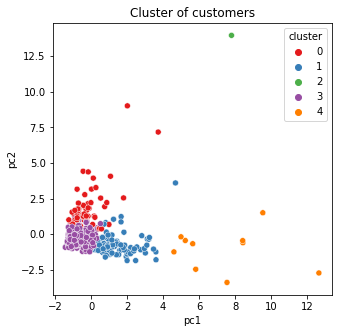

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='pc1', y='pc2', hue= 'cluster', data=pca_cluster,palette='Set1').set_title('Cluster of customers')
plt.show()

In [ ]:
from sklearn.decomposition import PCA



pca = PCA(n_components=2)

X_kmeans = pca.fit_transform(X)



pca.explained_variance_ratio_

array([0.44082893, 0.283764  ])

In [ ]:

sum(pca.explained_variance_ratio_)



0.7245929240774498

In [ ]:
(y_kmeans==3).sum()

270

part 2 - heirarchical clustering

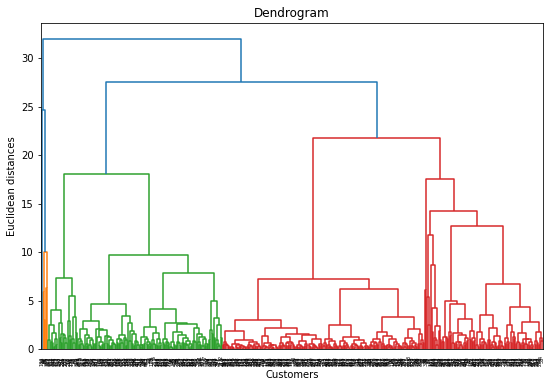

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(9, 6))  
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

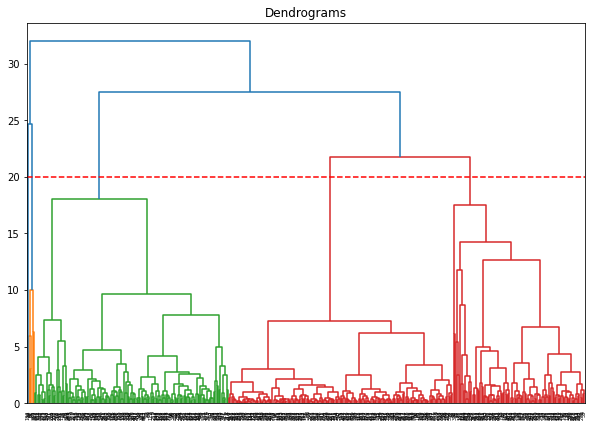

In [ ]:
# to know thenumber of clusters 
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')

In [ ]:

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

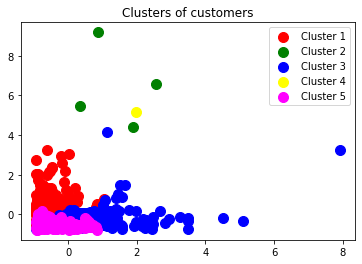

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [ ]:
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc2 = hc.fit_predict(X)

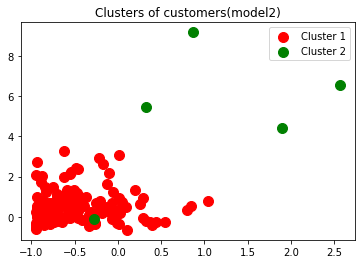

In [ ]:
plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.title('Clusters of customers(model2)')
plt.legend()
plt.show()


In [ ]:
whole_cluster_hc = wholesale_data2
whole_cluster_hc['Cluster'] = y_hc

In [ ]:
whole_cluster_hc.Cluster.value_counts()

4    177
0    153
2    104
1      5
3      1
Name: Cluster, dtype: int64

In [ ]:

## Using PCA FOR VISUALIZATION
pca_cluster_hc = pd.concat([pc_wholesale_data2,whole_cluster_hc['Cluster']],axis=1)

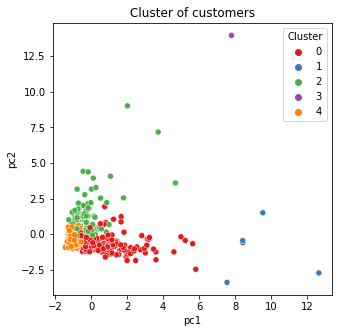

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='pc1', y='pc2', hue= 'Cluster', data=pca_cluster_hc,palette='Set1').set_title('Cluster of customers')
plt.show()

In [ ]:
from sklearn.decomposition import PCA



pca = PCA(n_components=2)

X_Agg = pca.fit_transform(X)



pca.explained_variance_ratio_

array([0.44082893, 0.283764  ])

In [ ]:

sum(pca.explained_variance_ratio_)



0.7245929240774498

In [ ]:
whole_cluster_hc.head(15)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Cluster
0,12669,9656,7561,214,2674,1338,3,0
1,7057,9810,9568,1762,3293,1776,1,0
2,6353,8808,7684,2405,3516,7844,1,0
3,13265,1196,4221,6404,507,1788,3,4
4,22615,5410,7198,3915,1777,5185,0,2
5,9413,8259,5126,666,1795,1451,3,0
6,12126,3199,6975,480,3140,545,3,0
7,7579,4956,9426,1669,3321,2566,3,0
8,5963,3648,6192,425,1716,750,3,4
9,6006,11093,18881,1159,7425,2098,1,0
